## Original Data


In [53]:
import jsonlines

with jsonlines.open('../data/kotlin-public.jsonl') as reader:
    kotlin_datapoints = [obj for obj in reader]

with jsonlines.open('../data/python-public.jsonl') as reader:
    python_datapoints = [obj for obj in reader]

In [54]:
import pandas as pd

kotlin_datapoints = pd.DataFrame(kotlin_datapoints, columns=list(kotlin_datapoints[0].keys()))
python_datapoints = pd.DataFrame(python_datapoints, columns=list(python_datapoints[0].keys()))

In [55]:
kotlin_datapoints.head()

,id,repo,revision,path,modified,prefix,suffix,archive
0,797c52,Anthonyy232/Paperize,09a6e2f031bd9a350ba17b398813d62c37982f5c,app/src/main/java/com/anthonyla/livewallpaper/...,[app/src/main/java/com/anthonyla/livewallpaper...,package com.anthonyla.livewallpaper.navigation...,}\n ...,Anthonyy232__Paperize-09a6e2f031bd9a350ba17b39...
1,35f83f,Anthonyy232/Paperize,322a10bf0c9f9bbef49f4fa75f149f198f9598a8,app/src/main/java/com/anthonyla/paperize/featu...,[app/src/main/java/com/anthonyla/paperize/core...,package com.anthonyla.paperize.feature.wallpap...,if (shouldScheduleAlar...,Anthonyy232__Paperize-322a10bf0c9f9bbef49f4fa7...
2,44457a,Anthonyy232/Paperize,37858a3e5c1bb7cfd8eb3e0bf769502fb2668db0,app/src/main/java/com/anthonyla/paperize/featu...,[app/src/main/java/com/anthonyla/paperize/App....,package com.anthonyla.paperize.feature.wallpap...,is SettingsEvent.RefreshWallpaperS...,Anthonyy232__Paperize-37858a3e5c1bb7cfd8eb3e0b...
3,a23204,Anthonyy232/Paperize,48a730e4a9be938118cae2bb66eef528fdbd7c2b,app/src/main/java/com/anthonyla/paperize/featu...,[app/src/main/java/com/anthonyla/paperize/core...,package com.anthonyla.paperize.feature.wallpap...,"inverseSurface = Color.White,\n inverse...",Anthonyy232__Paperize-48a730e4a9be938118cae2bb...
4,0fa786,Anthonyy232/Paperize,5eb55575b4a33d5f9206780ff5e1316f13354de6,app/src/main/java/com/anthonyla/paperize/featu...,[app/src/main/java/com/anthonyla/paperize/App....,package com.anthonyla.paperize.feature.wallpap...,"),\n enterTransition = ...",Anthonyy232__Paperize-5eb55575b4a33d5f9206780f...


In [96]:
num_revisions_per_kotlin_datapoints = kotlin_datapoints.groupby('repo')['id'].count().sort_values(ascending=False)

<Axes: title={'center': 'Number of revisions per repository for Kotlin dataset'}, xlabel='Repository', ylabel='Number of revisions'>

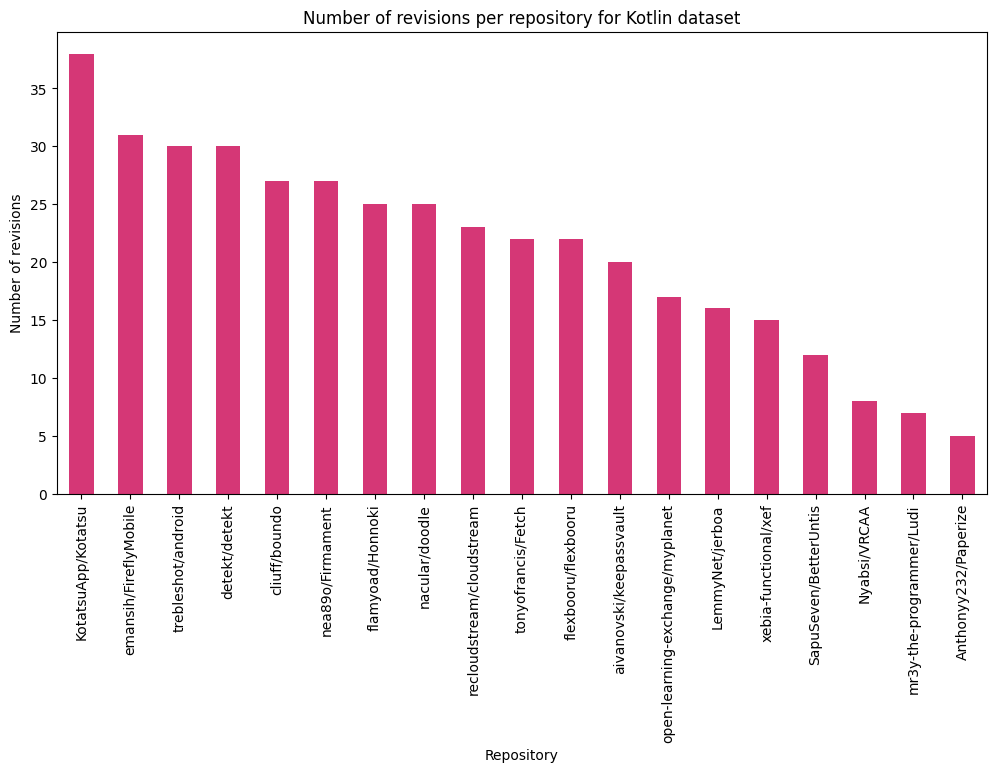

In [101]:
num_revisions_per_kotlin_datapoints.plot(kind='bar', title='Number of revisions per repository for Kotlin dataset', xlabel='Repository', ylabel='Number of revisions', figsize=(12, 6), color='#d53776')

<Axes: title={'center': 'Number of revisions per repository for Python dataset'}, xlabel='Repository', ylabel='Number of revisions'>

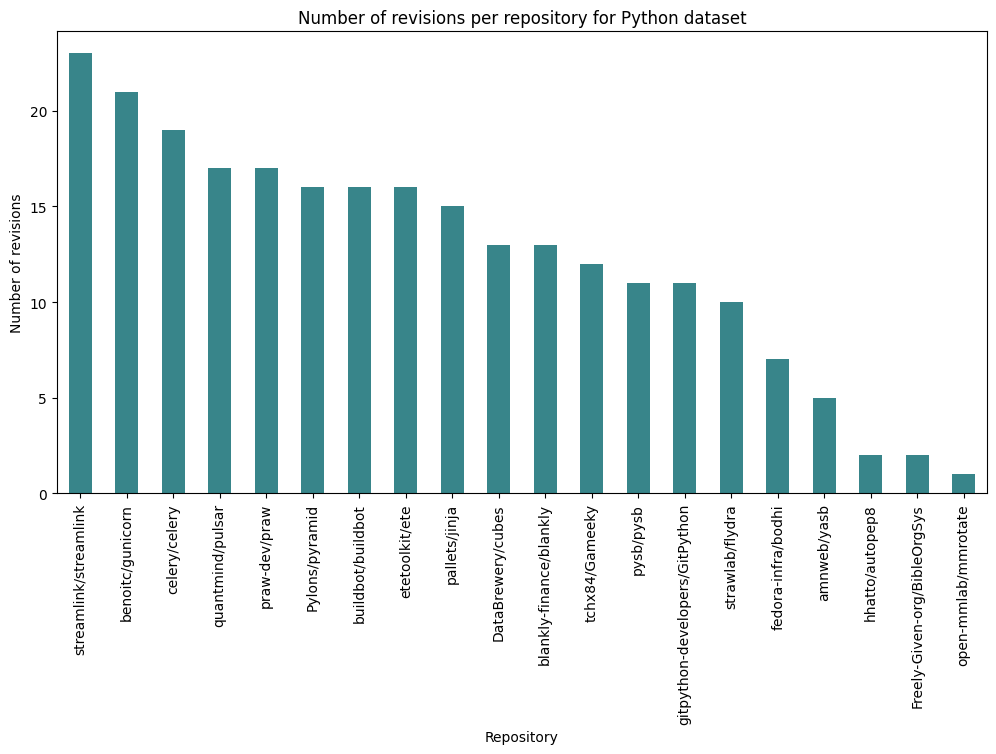

In [102]:

num_revisions_per_python_datapoints = python_datapoints.groupby('repo')['id'].count().sort_values(ascending=False)
num_revisions_per_python_datapoints.plot(kind='bar', title='Number of revisions per repository for Python dataset', xlabel='Repository', ylabel='Number of revisions', figsize=(12, 6), color='#38858a')

## Generated Zoekt Queries

In [56]:
import jsonlines
import pandas as pd



with jsonlines.open('../queries/kotlin-public-singleshard.jsonl') as reader:
    kotlin_queries = [obj['candidates'] for obj in reader]


QUERY_DESCRIPTIONS = {
            "functions_classes_naive": "functions_classes_naive.jsonl",
            "functions_classes_or": "functions_classes_or.jsonl", 
            "functions_classes_top5": "functions_classes_top5.jsonl",
            "functions_classes_top4": "functions_classes_top4.jsonl",
            "functions_classes_top3": "functions_classes_top3.jsonl",
            "functions_classes_regex": "functions_classes_regex.jsonl",
            "navigation_naive": "navigation_naive.jsonl",
            "navigation_unpacked": "navigation_unpacked.jsonl",
            "navigation_unpacked_or": "navigation_unpacked_or.jsonl",
            "navigation_unpacked_top5": "navigation_unpacked_top5.jsonl",
            "navigation_unpacked_top4": "navigation_unpacked_top4.jsonl",
            "navigation_unpacked_top3": "navigation_unpacked_top3.jsonl",
            "navigation_regex": "navigation_regex.jsonl",
            "identifiers_naive": "identifiers_naive.jsonl",
            "identifiers_or": "identifiers_or.jsonl",
            "identifiers_top5": "identifiers_top5.jsonl",
            "identifiers_top4": "identifiers_top4.jsonl",
            "identifiers_top3": "identifiers_top3.jsonl",
            "identifiers_regex": "identifiers_regex.jsonl"
        }
QUERY_DESCRIPTIONS_KEYS = list(QUERY_DESCRIPTIONS.keys())

kotlin_queries = pd.DataFrame(kotlin_queries, columns=QUERY_DESCRIPTIONS_KEYS)
kotlin_queries['id'] = kotlin_datapoints['id']

In [ ]:
number_of_kotlin_queries_extracted = kotlin_queries.notna().sum()

In [ ]:
number_of_kotlin_queries_extracted.plot(kind='bar', color='#d53776', figsize=(12, 6), title='Number of Queries Extracted')

<Axes: title={'center': 'Number of Queries Extracted'}>

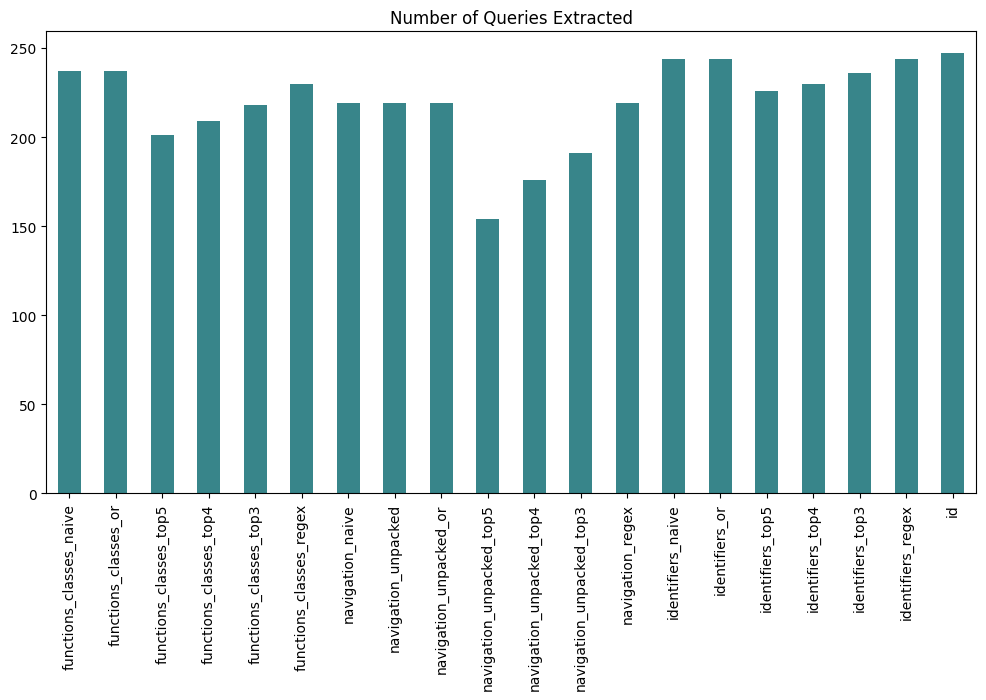

In [57]:
with jsonlines.open('../queries/python-public-singleshard.jsonl') as reader:
    python_queries = [obj['candidates'] for obj in reader]
    
python_queries = pd.DataFrame(python_queries, columns=QUERY_DESCRIPTIONS_KEYS)
python_queries['id'] = python_datapoints['id']
number_of_python_queries_extracted = python_queries.notna().sum()
number_of_python_queries_extracted.plot(kind='bar', color='#38858a', figsize=(12, 6), title='Number of Queries Extracted')

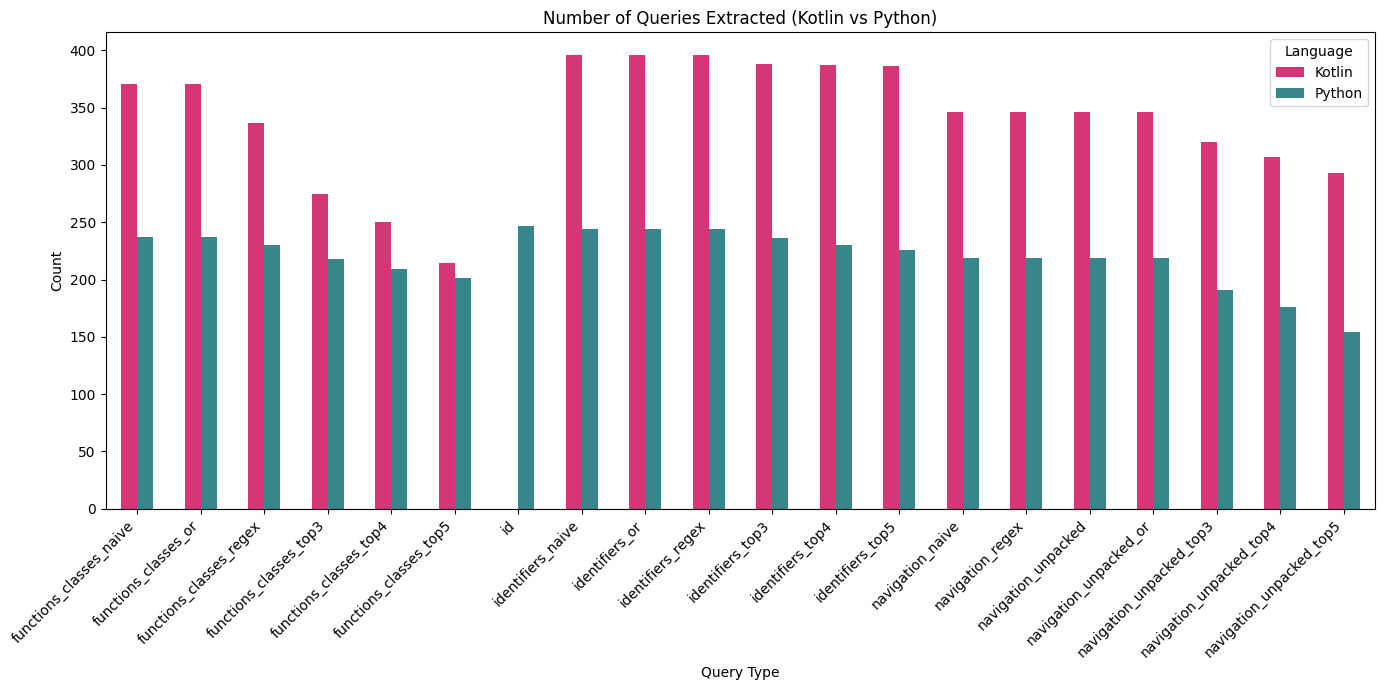

In [58]:

import matplotlib.pyplot as plt

counts_df = pd.DataFrame({
    'Kotlin': number_of_kotlin_queries_extracted,
    'Python': number_of_python_queries_extracted
})

# Clustered bar chart
ax = counts_df.plot(kind='bar', figsize=(14, 7), color=['#d53776', '#38858a'])
plt.title('Number of Queries Extracted (Kotlin vs Python)')
plt.ylabel('Count')
plt.xlabel('Query Type')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Language')
plt.tight_layout()
plt.show()

## Single-shard Search vs Multi-shard Search

### Hit and Miss Analysis

In [ ]:
with jsonlines.open('../predictions/python-public-predictions-singleshard.jsonl') as reader:
    python_context_singleshard_settings = [obj for obj in reader]
python_context_singleshard_settings = pd.DataFrame(python_context_singleshard_settings)

In [ ]:
python_context_singleshard_settings

In [ ]:
contexts = python_context_singleshard_settings['context']



In [ ]:
founded_contexts= contexts[contexts!='']
founded_contexts= contexts[contexts!='']
total_contexts = len(contexts)
hits = len(founded_contexts)
misses = total_contexts - hits

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie([hits, misses], labels=['Hit', 'Miss'], autopct='%1.1f%%', colors=['#4caf50', '#f44336'], startangle=90)
plt.title('Founded Contexts (Hit) vs Missed Contexts (Single Shard Search)')
plt.show()


In [ ]:
with jsonlines.open('../predictions/python-public-predictions-multishard.jsonl') as reader:
    python_context_multishard_settings = [obj for obj in reader]
python_context_multishard_settings = pd.DataFrame(python_context_multishard_settings)

python_founded_contexts= python_context_multishard_settings['context'][python_context_multishard_settings['context']!='']
# Calculate hits and misses
total_contexts = len(python_context_multishard_settings)
hits = len(python_founded_contexts)
misses = total_contexts - hits

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie([hits, misses], labels=['Hit', 'Miss'], autopct='%1.1f%%', colors=['#4caf50', '#f44336'], startangle=90)
plt.title('Founded Contexts (Hit) vs Missed Contexts (Cross-shard search)')
plt.show()


In [ ]:
with jsonlines.open('../predictions/kotlin-public-predictions-multishard.jsonl') as reader:
    kotlin_context_multishard_settings = [obj for obj in reader]
kotlin_context_multishard_settings = pd.DataFrame(kotlin_context_multishard_settings)

kotlin_founded_contexts= kotlin_context_multishard_settings['context'][kotlin_context_multishard_settings['context']!='']
# Calculate hits and misses
total_contexts = len(kotlin_context_multishard_settings)
hits = len(kotlin_founded_contexts)
misses = total_contexts - hits

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie([hits, misses], labels=['Hit', 'Miss'], autopct='%1.1f%%', colors=['#4caf50', '#f44336'], startangle=90)
plt.title('Founded Contexts (Hit) vs Missed Contexts (Cross-shard search)')
plt.show()


In [ ]:
with jsonlines.open('../predictions/kotlin-public-predictions-singleshard.jsonl') as reader:
    kotlin_context_single_settings = [obj for obj in reader]
kotlin_context_single_settings = pd.DataFrame(kotlin_context_single_settings)

kotlin_founded_contexts= kotlin_context_single_settings['context'][kotlin_context_single_settings['context']!='']
# Calculate hits and misses
total_contexts = len(kotlin_context_single_settings)
hits = len(kotlin_founded_contexts)
misses = total_contexts - hits

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie([hits, misses], labels=['Hit', 'Miss'], autopct='%1.1f%%', colors=['#4caf50', '#f44336'], startangle=90)
plt.title('Founded Contexts (Hit) vs Missed Contexts (Single-shardsearch)')
plt.show()


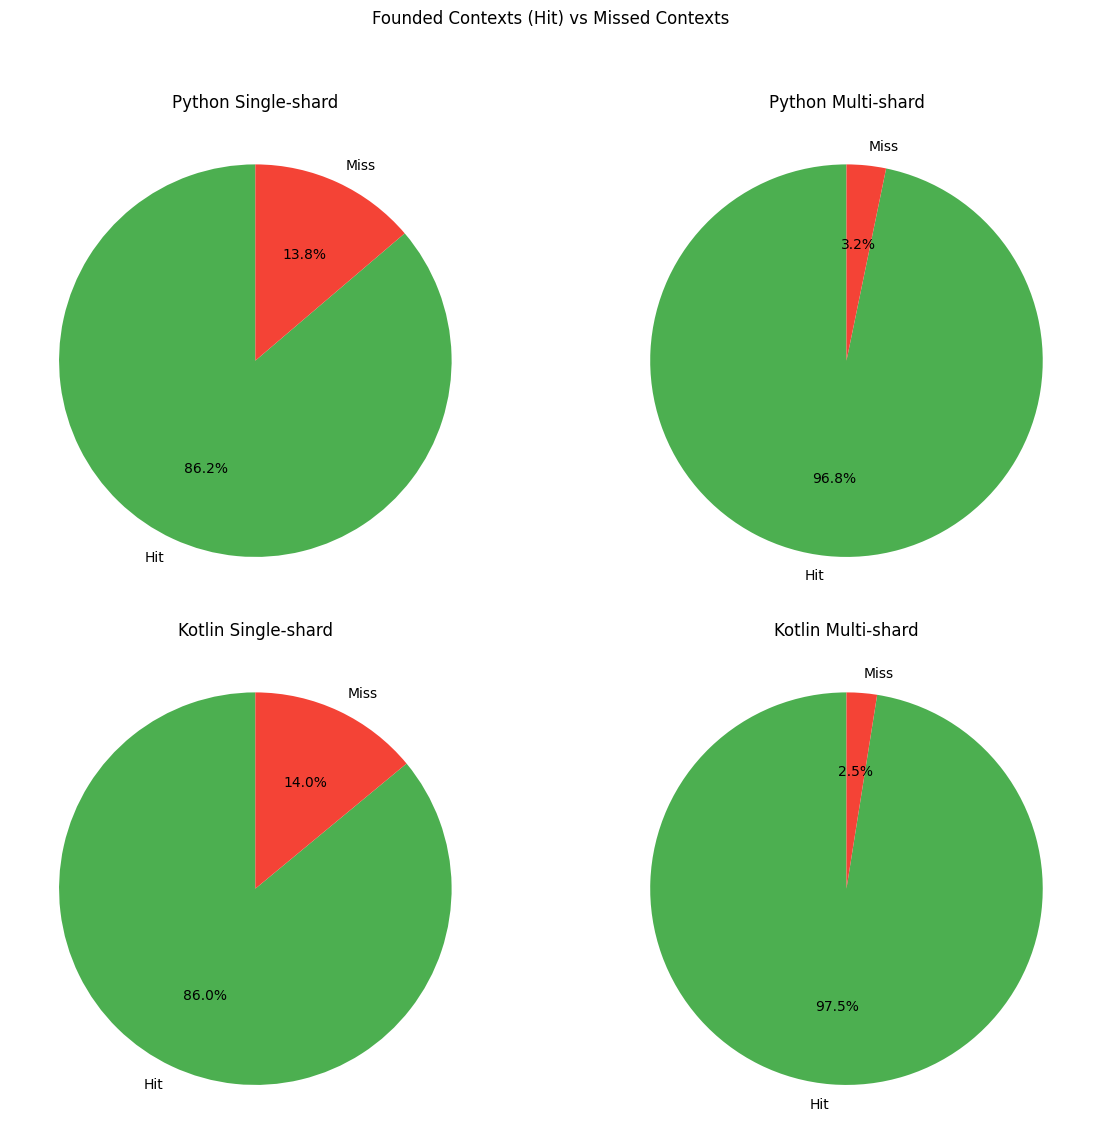

In [59]:
import matplotlib.pyplot as plt

# --- Python Single-shard ---
with jsonlines.open('../predictions/python-public-predictions-singleshard.jsonl') as reader:
    python_context_singleshard_settings = [obj for obj in reader]
python_context_singleshard_settings = pd.DataFrame(python_context_singleshard_settings)
python_context_singleshard_settings['id'] = python_datapoints['id']
python_contexts_single = python_context_singleshard_settings['context']
python_hits_single = (python_contexts_single != '').sum()
python_total_single = len(python_contexts_single)
python_misses_single = python_total_single - python_hits_single

# --- Python Multi-shard ---
with jsonlines.open('../predictions/python-public-predictions-multishard.jsonl') as reader:
    python_context_multishard_settings = [obj for obj in reader]
python_context_multishard_settings = pd.DataFrame(python_context_multishard_settings)
python_context_multishard_settings['id'] = python_datapoints['id']
python_contexts_multi = python_context_multishard_settings['context']
python_hits_multi = (python_contexts_multi != '').sum()
python_total_multi = len(python_contexts_multi)
python_misses_multi = python_total_multi - python_hits_multi

# --- Kotlin Single-shard ---
with jsonlines.open('../predictions/kotlin-public-predictions-singleshard.jsonl') as reader:
    kotlin_context_single_settings = [obj for obj in reader]
kotlin_context_single_settings = pd.DataFrame(kotlin_context_single_settings)
kotlin_context_single_settings['id'] = kotlin_datapoints['id']
kotlin_contexts_single = kotlin_context_single_settings['context']
kotlin_hits_single = (kotlin_contexts_single != '').sum()
kotlin_total_single = len(kotlin_contexts_single)
kotlin_misses_single = kotlin_total_single - kotlin_hits_single

# --- Kotlin Multi-shard ---
with jsonlines.open('../predictions/kotlin-public-predictions-multishard.jsonl') as reader:
    kotlin_context_multishard_settings = [obj for obj in reader]
kotlin_context_multishard_settings = pd.DataFrame(kotlin_context_multishard_settings)
kotlin_context_multishard_settings['id'] = kotlin_datapoints['id']
kotlin_contexts_multi = kotlin_context_multishard_settings['context']
kotlin_hits_multi = (kotlin_contexts_multi != '').sum()
kotlin_total_multi = len(kotlin_contexts_multi)
kotlin_misses_multi = kotlin_total_multi - kotlin_hits_multi

# --- Plot all 4 pie charts as subplots ---
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Python Single-shard
axs[0, 0].pie([python_hits_single, python_misses_single], labels=['Hit', 'Miss'], autopct='%1.1f%%', colors=['#4caf50', '#f44336'], startangle=90)
axs[0, 0].set_title('Python Single-shard')

# Python Multi-shard
axs[0, 1].pie([python_hits_multi, python_misses_multi], labels=['Hit', 'Miss'], autopct='%1.1f%%', colors=['#4caf50', '#f44336'], startangle=90)
axs[0, 1].set_title('Python Multi-shard')

# Kotlin Single-shard
axs[1, 0].pie([kotlin_hits_single, kotlin_misses_single], labels=['Hit', 'Miss'], autopct='%1.1f%%', colors=['#4caf50', '#f44336'], startangle=90)
axs[1, 0].set_title('Kotlin Single-shard')

# Kotlin Multi-shard
axs[1, 1].pie([kotlin_hits_multi, kotlin_misses_multi], labels=['Hit', 'Miss'], autopct='%1.1f%%', colors=['#4caf50', '#f44336'], startangle=90)
axs[1, 1].set_title('Kotlin Multi-shard')

plt.suptitle('Founded Contexts (Hit) vs Missed Contexts')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [62]:
missed_single_shard_ids_python = python_context_singleshard_settings[python_context_singleshard_settings['context'] == '']['id']

In [63]:
founded_contexts_multi_python = python_context_multishard_settings[python_context_multishard_settings['context'] != '']['id']

In [66]:
recovered_python_datapoints_via_multishard  = python_datapoints[python_datapoints['id'].isin(founded_contexts_multi_python) & python_datapoints['id'].isin(missed_single_shard_ids_python)]

In [68]:
recovered_python_datapoints_via_multishard['multishard_contexts'] = python_context_multishard_settings['context'][python_context_multishard_settings['id'].isin(recovered_python_datapoints_via_multishard['id'])]

/var/folders/zp/szh0mrgs5kd7_hbdypcwh22h0000gn/T/ipykernel_36712/3740195171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recovered_python_datapoints_via_multishard['multishard_contexts'] = python_context_multishard_settings['context'][python_context_multishard_settings['id'].isin(recovered_python_datapoints_via_multishard['id'])]


In [72]:
recovered_python_datapoints_via_multishard['splitted_contexts'] = recovered_python_datapoints_via_multishard['multishard_contexts'].apply(lambda x: x.split('<|file_sep|>')[1:])

/var/folders/zp/szh0mrgs5kd7_hbdypcwh22h0000gn/T/ipykernel_36712/2817603195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recovered_python_datapoints_via_multishard['splitted_contexts'] = recovered_python_datapoints_via_multishard['multishard_contexts'].apply(lambda x: x.split('<|file_sep|>')[1:])


In [74]:
recovered_python_datapoints_via_multishard['context_filenames'] = recovered_python_datapoints_via_multishard['splitted_contexts'].apply(lambda x: [y.split('\n')[0] for y in x])

/var/folders/zp/szh0mrgs5kd7_hbdypcwh22h0000gn/T/ipykernel_36712/3892805596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recovered_python_datapoints_via_multishard['context_filenames'] = recovered_python_datapoints_via_multishard['splitted_contexts'].apply(lambda x: [y.split('\n')[0] for y in x])


In [75]:
recovered_python_datapoints_via_multishard['context_filenames']

4                                [cubes/tutorial/sql.py]
5      [cubes/model.py, cubes/model.py, cubes/model.p...
15                                  [repoze/bfg/xslt.py]
16                            [repoze/bfg/interfaces.py]
17     [pyramid/renderers.py, pyramid/renderers.py, p...
49                                [tests/test_statsd.py]
50                                [gunicorn/reloader.py]
51     [gunicorn/config.py, gunicorn/config.py, gunic...
80                         [master/buildbot/util/lru.py]
81                   [master/buildbot/worker/manager.py]
82                         [master/contrib/bb_applet.py]
83                    [master/buildbot/config/checks.py]
84           [master/buildbot/test/fakedb/build_data.py]
102                        [t/unit/backends/test_rpc.py]
103           [celery/tests/test_backends/test_cache.py]
104           [celery/tests/test_task/test_task_sets.py]
116             [tests/test_tree.py, tests/test_tree.py]
117                            

In [82]:
recovered_python_datapoints_via_multishard[['path', 'context_filenames']]

,path,context_filenames
4,cubes/tutorial/sql.py,[cubes/tutorial/sql.py]
5,cubes/util.py,"[cubes/model.py, cubes/model.py, cubes/model.p..."
15,repoze/bfg/template.py,[repoze/bfg/xslt.py]
16,repoze/bfg/interfaces.py,[repoze/bfg/interfaces.py]
17,repoze/bfg/renderers.py,"[pyramid/renderers.py, pyramid/renderers.py, p..."
49,tests/test_010-statsd.py,[tests/test_statsd.py]
50,gunicorn/reloader.py,[gunicorn/reloader.py]
51,gunicorn/sock.py,"[gunicorn/config.py, gunicorn/config.py, gunic..."
80,master/buildbot/util/lru.py,[master/buildbot/util/lru.py]
81,master/buildbot/test/util/sandboxed_worker.py,[master/buildbot/worker/manager.py]


<Axes: title={'center': 'How many contexts can be found in the same file but at other commits?'}, ylabel='count'>

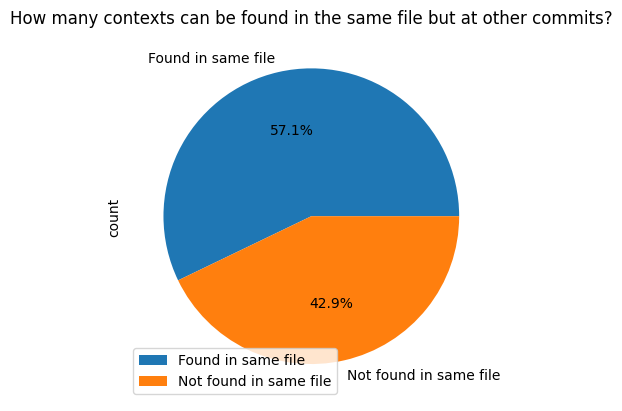

In [88]:
recovered_python_datapoints_via_multishard[['path', 'context_filenames']].apply(
    lambda row: row['path'] in row['context_filenames'], axis=1
).value_counts().plot(
    kind='pie',
    title='How many contexts can be found in the same file but at other commits?',
    labels=['Found in same file', 'Not found in same file'],
    legend=True,
    autopct='%1.1f%%'
)

/var/folders/zp/szh0mrgs5kd7_hbdypcwh22h0000gn/T/ipykernel_36712/3642416386.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recovered_kotlin_datapoints_via_multishard['multishard_contexts'] = kotlin_context_multishard_settings['context'][
/var/folders/zp/szh0mrgs5kd7_hbdypcwh22h0000gn/T/ipykernel_36712/3642416386.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recovered_kotlin_datapoints_via_multishard['splitted_contexts'] = recovered_kotlin_datapoints_via_multishard['multishard_contexts'].apply(


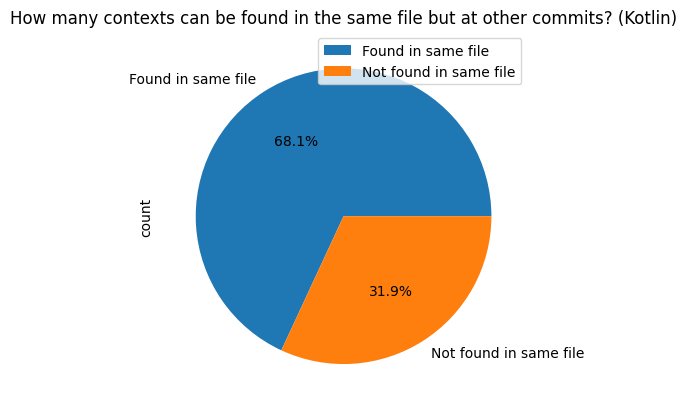

In [90]:
# --- For Kotlin ---
# Find missed single-shard ids
missed_single_shard_ids_kotlin = kotlin_context_single_settings[kotlin_context_single_settings['context'] == '']['id']
# Find founded multi-shard ids
founded_contexts_multi_kotlin = kotlin_context_multishard_settings[kotlin_context_multishard_settings['context'] != '']['id']
# Find recovered datapoints
recovered_kotlin_datapoints_via_multishard = kotlin_datapoints[
    kotlin_datapoints['id'].isin(founded_contexts_multi_kotlin) & kotlin_datapoints['id'].isin(missed_single_shard_ids_kotlin)
]
# Add multishard contexts
recovered_kotlin_datapoints_via_multishard['multishard_contexts'] = kotlin_context_multishard_settings['context'][
    kotlin_context_multishard_settings['id'].isin(recovered_kotlin_datapoints_via_multishard['id'])
]
# Split contexts
recovered_kotlin_datapoints_via_multishard['splitted_contexts'] = recovered_kotlin_datapoints_via_multishard['multishard_contexts'].apply(
    lambda x: x.split('<|file_sep|>')[1:] if isinstance(x, str) else []
)
# Extract filenames
recovered_kotlin_datapoints_via_multishard['context_filenames'] = recovered_kotlin_datapoints_via_multishard['splitted_contexts'].apply(
    lambda x: [y.split('\n')[0] for y in x]
)
# Pie chart for Kotlin
recovered_kotlin_datapoints_via_multishard[['path', 'context_filenames']].apply(
    lambda row: row['path'] in row['context_filenames'], axis=1
).value_counts().plot(
    kind='pie',
    title='How many contexts can be found in the same file but at other commits? (Kotlin)',
    labels=['Found in same file', 'Not found in same file'],
    legend=True,
    autopct='%1.1f%%'
)

plt.show()